In [2]:
%store -r

import pandas as pd

df1 = df.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI"])
df2 = df.drop(columns=["Obesity", "HBP", "height", "weight"])

df1 = pd.get_dummies(df1, columns=["Obesity", "HBP", "gender"])
df2 = pd.get_dummies(df2, columns=["gender"])

In [26]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity,HBP
count,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000,66938.000000
mean,50003.315381,19443.165735,1.347799,164.454973,73.963457,125.572784,81.176268,1.359781,1.223236,0.087723,0.053034,0.803669,0.485972,27.379687,1.981490,2.874078
std,28848.643559,2469.397738,0.476276,7.817056,14.175872,15.064639,9.220515,0.675821,0.569388,0.282894,0.224103,0.397225,0.499807,5.149973,1.006738,0.898726
min,0.000000,10798.000000,1.000000,131.000000,30.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.254473,1.000000,1.000000
25%,25024.500000,17631.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,1.000000,3.000000
50%,50071.000000,19690.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.291724,2.000000,3.000000
75%,74906.500000,21309.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.102119,3.000000,3.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,210.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.381084,5.000000,5.000000


In [3]:
from sklearn.model_selection import train_test_split

X1, y1 = df1.drop("cardio", axis=1), df1["cardio"]
X2, y2 = df2.drop("cardio", axis=1), df2["cardio"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

print(X1_train.shape, X1_val.shape, X1_test.shape, y1_train.shape, y1_val.shape, y1_test.shape)
print(X2_train.shape, X2_val.shape, X2_test.shape, y2_train.shape, y2_val.shape, y2_test.shape)

(40162, 19) (13388, 19) (13388, 19) (40162,) (13388,) (13388,)
(40162, 12) (13388, 12) (13388, 12) (40162,) (13388,) (13388,)


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
sX1_train = scaler.fit_transform(X1_train)
sX1_val = scaler.transform(X1_val)
sX1_test = scaler.transform(X1_test)

sX2_train = scaler.fit_transform(X2_train)
sX2_val = scaler.transform(X2_val)
sX2_test = scaler.transform(X2_test)

scaler = MinMaxScaler()
scaler.fit(sX1_train)
snX1_train=scaler.transform(sX1_train)
snX1_test=scaler.transform(sX1_test)
snX1_val=scaler.transform(sX1_val)

scaler.fit(sX2_train)
snX2_train=scaler.transform(sX2_train)
snX2_test=scaler.transform(sX2_test)
snX2_val=scaler.transform(sX2_val)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

def KNN(xtr,ytr):
    pipe_KNN=Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
    param_grid_KNN = {"knn__n_neighbors": list(range(1,30))}
    classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN, scoring="accuracy")
    classifier_KNN.fit(xtr, ytr)
    return classifier_KNN, classifier_KNN.best_estimator_.get_params()

def LOG(xtr,ytr):
    pipe_log=Pipeline([("scaler", scaler), ("log", LogisticRegression(solver="saga", max_iter=1000, penalty="elasticnet"))])
    param_grid_log={"log__l1_ratio": np.linspace(0, 1, 20)}
    classifier_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, scoring="accuracy")
    classifier_log.fit(xtr, ytr)
    return classifier_log, classifier_log.best_estimator_.get_params()

def SVM(xtr,ytr):
    param_grid_SVM = {"C":[0.1, 1, 10], "gamma":[1, 0.1, 0.01], "kernel": ["rbf"]}
    classifier_SVM = GridSearchCV(SVC(), param_grid_SVM, refit=True, verbose=3)
    classifier_SVM.fit(xtr, ytr)
    return classifier_SVM, classifier_SVM.best_estimator_.get_params()
    

def Conf_Matr_Disp(clf,xval,yval):
    y_pred=clf.predict(xval)
    print(classification_report(yval, y_pred))
    cm=confusion_matrix(yval, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    
# a,b=KNN(snX1_train,y1_train)
# c,d=LOG(snX1_train,y1_train)
# e,f=SVM(snX1_train,y1_train)
# Conf_Matr_Disp(a, snX1_val, y1_val)

g,h=KNN(snX2_train, y2_train)
i,j=LOG(snX2_train, y2_train)
k,l=SVM(snX2_train, y2_train)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time= 1.3min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time= 1.3min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time= 1.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time= 1.3min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time= 1.3min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time= 1.3min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time= 1.3min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time= 1.3min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time= 1.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time= 1.3min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.670 total time= 1.5min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      6874
           1       0.73      0.60      0.65      6514

    accuracy                           0.69     13388
   macro avg       0.70      0.69      0.69     13388
weighted avg       0.70      0.69      0.69     13388

a
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6874
           1       0.74      0.61      0.67      6514

    accuracy                           0.71     13388
   macro avg       0.71      0.70      0.70     13388
weighted avg       0.71      0.71      0.70     13388

b
              precision    recall  f1-score   support

           0       0.67      0.81      0.74      6874
           1       0.75      0.59      0.66      6514

    accuracy                           0.70     13388
   macro avg       0.71      0.70      0.70     13388
weighted avg       0.71      0.70      0.70     13388

c


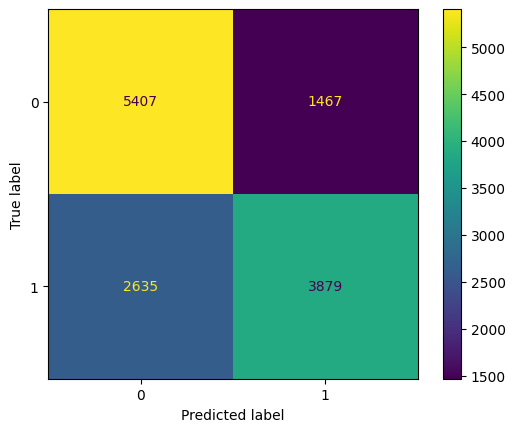

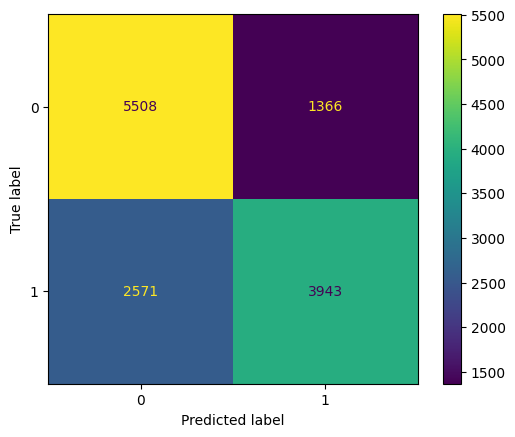

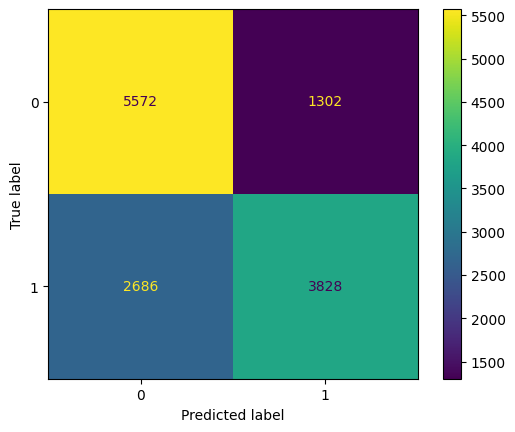

In [15]:
Conf_Matr_Disp(a, snX1_val, y1_val)
print("a")
Conf_Matr_Disp(c, snX1_val, y1_val)
print("b")
Conf_Matr_Disp(e, snX1_val, y1_val)
print("c")

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6874
           1       0.74      0.66      0.70      6514

    accuracy                           0.72     13388
   macro avg       0.72      0.72      0.72     13388
weighted avg       0.72      0.72      0.72     13388

a
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6874
           1       0.75      0.66      0.70      6514

    accuracy                           0.73     13388
   macro avg       0.73      0.72      0.72     13388
weighted avg       0.73      0.73      0.72     13388

b
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      6874
           1       0.76      0.65      0.70      6514

    accuracy                           0.73     13388
   macro avg       0.73      0.73      0.73     13388
weighted avg       0.73      0.73      0.73     13388

c


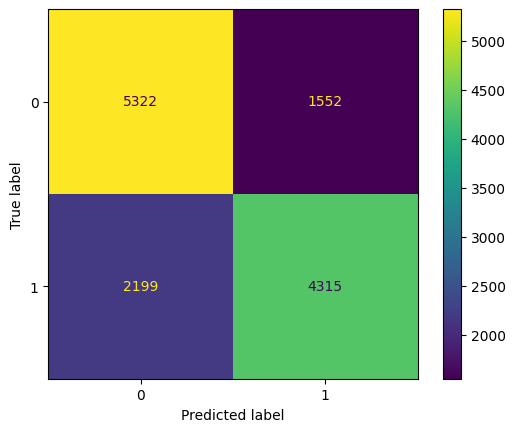

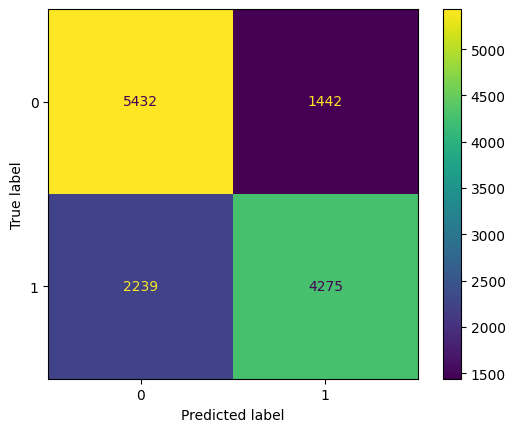

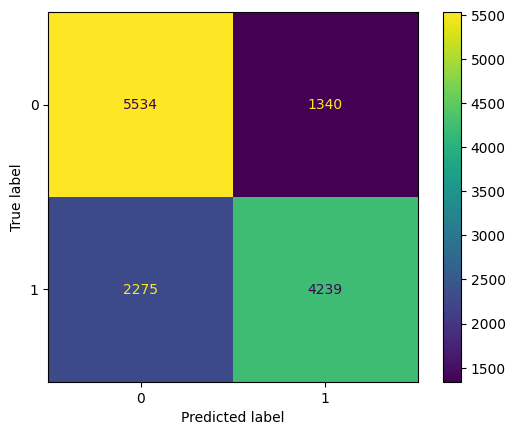

In [17]:
Conf_Matr_Disp(g, snX2_val, y2_val)
print("a")
Conf_Matr_Disp(i, snX2_val, y2_val)
print("b")
Conf_Matr_Disp(k, snX2_val, y2_val)
print("c")

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1=LogisticRegression(l1_ratio=0.9, penalty="elasticnet", solver="saga")
clf2=KNeighborsClassifier(n_neighbors=25)
clf3=SVC(gamma=1, C=1, kernel="rbf")

eclf1=VotingClassifier(estimators=[("log",clf1), ("knn",clf2), ("svc",clf3)],voting="hard")
eclf1.fit(snX1_train, y1_train)

y1_pred = eclf1.predict(snX1_val)
y1_pred


array([0, 0, 1, ..., 0, 1, 0], shape=(13388,))

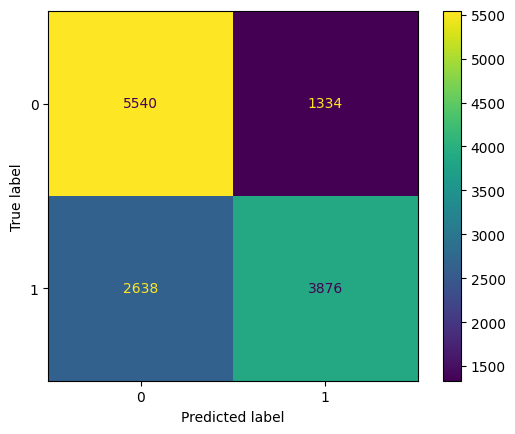

In [18]:
cm=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
l

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}